# **Detection of Cyber Attacks using ML**

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#importing basic packages

import os 
import timeit
import warnings 
from collections import defaultdict

import catboost as cb 
import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import xgboost as xgb
import copy
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import SGDClassifier 
from sklearn.metrics import accuracy_score, classification_report
#plot_confusion_matrix 
from sklearn.metrics import confusion_matrix, zero_one_loss
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from termcolor import colored

In [ ]:
df_train = pd.read_csv('KDDTrain+.txt', sep=",", header=None)
df_train = df_train[df_train.columns[:-1]]
titles = pd.read_csv('Field Names.csv', header=None)
label = pd.Series(['label'], index=[41])
titles = titles[0].append(label)
df_train.columns = titles.to_list()
y_train = df_train['label']
df_train = df_train.drop(['num_outbound_cmds'],axis=1)
df_train_original = df_train
df_train_original

<ipython-input-14-ac049c3821e4>:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  titles = titles[0].append(label)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune


In [ ]:
df_test = pd.read_csv('KDDTest+.txt', sep=",", header=None)
df_test = df_test[df_test.columns[:-1]]
df_test.columns = titles.to_list()
y_test = df_test['label']
df_test = df_test.drop(['num_outbound_cmds'],axis=1)
df_test_original = df_test
df_test_original

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal
22540,0,tcp,http,SF,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal


In [ ]:
df_train = copy.deepcopy(df_train_original)
df_test = copy.deepcopy(df_test_original)

In [ ]:
dos_probe_list = ['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm','ipsweep','mscan','nmap','portsweep','saint','satan']

y_train = np.array([1 if x in dos_probe_list else 0 for x in df_train['label']])

df_train = df_train.drop(['label'],axis=1)
df_train = df_train.reset_index().drop(['index'], axis=1)
df_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,udp,other,SF,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,tcp,private,S0,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,tcp,http,SF,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00
125969,8,udp,private,SF,105,145,0,0,0,0,...,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00


In [ ]:
from sklearn.metrics import matthews_corrcoef
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
X_train = df_train.drop(['protocol_type','service','flag'],axis=1)
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

src_bytes                      0.575780
dst_bytes                      0.436269
same_srv_rate                  0.381445
diff_srv_rate                  0.371770
dst_host_srv_count             0.331658
dst_host_same_srv_rate         0.320802
logged_in                      0.318627
dst_host_diff_srv_rate         0.293879
dst_host_serror_rate           0.293492
dst_host_srv_serror_rate       0.288411
serror_rate                    0.286846
srv_serror_rate                0.277032
count                          0.273861
dst_host_srv_diff_host_rate    0.192514
dst_host_count                 0.150179
dst_host_same_src_port_rate    0.126397
srv_diff_host_rate             0.095213
srv_count                      0.069319
dst_host_srv_rerror_rate       0.066643
rerror_rate                    0.041684
dst_host_rerror_rate           0.037650
srv_rerror_rate                0.035912
duration                       0.027572
hot                            0.009803
wrong_fragment                 0.006909


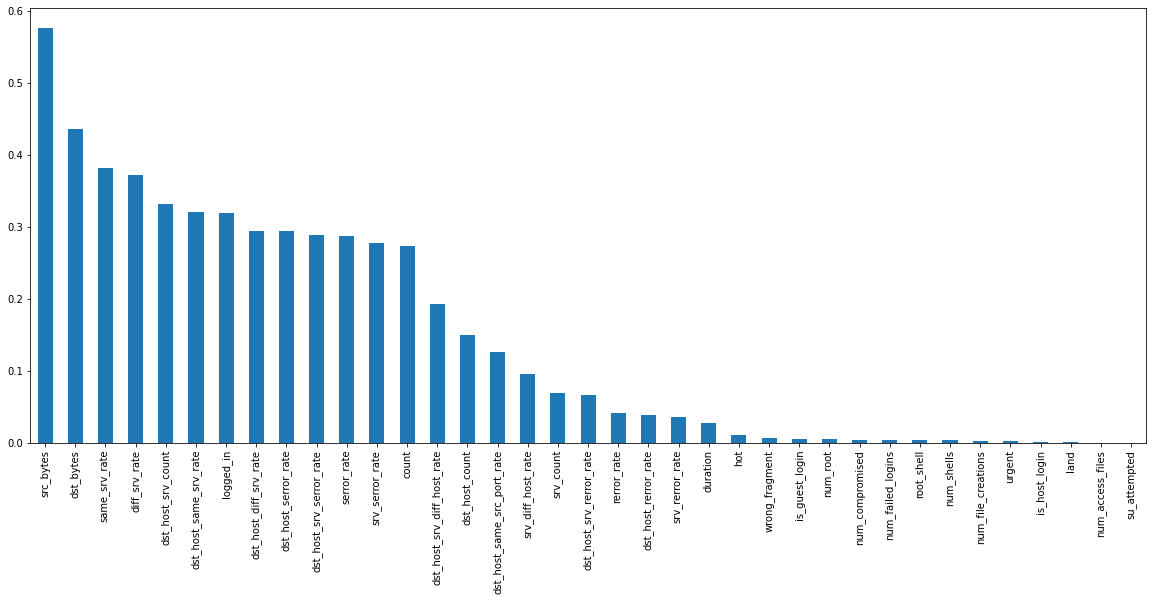

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8));

In [ ]:
sel_five_cols = SelectKBest(mutual_info_classif, k=20)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['src_bytes', 'dst_bytes', 'logged_in', 'count', 'srv_count',
       'serror_rate', 'srv_serror_rate', 'rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_srv_rerror_rate'],
      dtype='object')

In [ ]:
X_train = df_train[['logged_in', 'count', 'serror_rate', 'rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_srv_rerror_rate']]

In [ ]:
scaler1 = MinMaxScaler()
df_minmax = scaler1.fit_transform(X_train)
X_train = pd.DataFrame(df_minmax, columns=(X_train.columns))
X_train

,logged_in,count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_srv_rerror_rate
0,0.0,0.003914,0.0,0.0,1.00,0.00,0.00,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.00
1,0.0,0.025440,0.0,0.0,0.08,0.15,0.00,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0.00
2,0.0,0.240705,1.0,0.0,0.05,0.07,0.00,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00
3,1.0,0.009785,0.2,0.0,1.00,0.00,0.00,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.01
4,1.0,0.058708,0.0,0.0,1.00,0.00,0.09,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.0,0.360078,1.0,0.0,0.14,0.06,0.00,0.098039,0.10,0.06,0.00,0.00,1.00,1.00,0.00
125969,0.0,0.003914,0.0,0.0,1.00,0.00,0.00,0.956863,0.96,0.01,0.01,0.00,0.00,0.00,0.00
125970,1.0,0.001957,0.0,0.0,1.00,0.00,0.00,0.117647,0.12,0.06,0.00,0.00,0.72,0.00,0.00
125971,0.0,0.281800,1.0,0.0,0.06,0.05,0.00,0.031373,0.03,0.05,0.00,0.00,1.00,1.00,0.00


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
ohe = OneHotEncoder(handle_unknown='ignore')
label_enc = ohe.fit_transform(df_train.iloc[:,1:4])
label_enc.toarray()
new_labels = ohe.get_feature_names_out(['protocol_type', 'service', 'flag'])
df_enc = pd.DataFrame(data=label_enc.toarray(), columns=new_labels)
X_train = pd.concat([X_train, df_enc], axis=1)
X_train

,logged_in,count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,0.003914,0.0,0.0,1.00,0.00,0.00,0.098039,0.17,0.03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.025440,0.0,0.0,0.08,0.15,0.00,0.003922,0.00,0.60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.240705,1.0,0.0,0.05,0.07,0.00,0.101961,0.10,0.05,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.009785,0.2,0.0,1.00,0.00,0.00,1.000000,1.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.058708,0.0,0.0,1.00,0.00,0.09,1.000000,1.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.0,0.360078,1.0,0.0,0.14,0.06,0.00,0.098039,0.10,0.06,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
125969,0.0,0.003914,0.0,0.0,1.00,0.00,0.00,0.956863,0.96,0.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
125970,1.0,0.001957,0.0,0.0,1.00,0.00,0.00,0.117647,0.12,0.06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
125971,0.0,0.281800,1.0,0.0,0.06,0.05,0.00,0.031373,0.03,0.05,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_test = np.array([1 if x in dos_probe_list else 0 for x in df_test['label']])

df_test = df_test.drop(['label'],axis=1)
df_test = df_test.reset_index().drop(['index'], axis=1)
df_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00
1,0,tcp,private,REJ,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00
22540,0,tcp,http,SF,317,938,0,0,0,0,...,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00


In [ ]:
X_test = df_test[['logged_in', 'count', 'serror_rate', 'rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_srv_rerror_rate']]

In [ ]:
df_minmax = scaler1.transform(X_test)
X_test = pd.DataFrame(df_minmax, columns=(X_test.columns))
X_test

,logged_in,count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_srv_rerror_rate
0,0.0,0.448141,0.0,1.0,0.04,0.06,0.00,0.039216,0.04,0.06,0.00,0.00,0.00,0.0,1.00
1,0.0,0.266145,0.0,1.0,0.01,0.06,0.00,0.003922,0.00,0.06,0.00,0.00,0.00,0.0,1.00
2,0.0,0.001957,0.0,0.0,1.00,0.00,0.00,0.337255,0.61,0.04,0.61,0.02,0.00,0.0,0.00
3,0.0,0.001957,0.0,0.0,1.00,0.00,1.00,0.223529,1.00,0.00,1.00,0.28,0.00,0.0,0.00
4,0.0,0.001957,0.0,1.0,1.00,0.00,0.75,0.337255,0.31,0.17,0.03,0.02,0.00,0.0,0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,1.0,0.001957,0.0,0.0,1.00,0.00,0.00,0.552941,0.72,0.06,0.01,0.01,0.01,0.0,0.00
22540,1.0,0.003914,0.0,0.0,1.00,0.00,0.18,1.000000,1.00,0.00,0.01,0.01,0.01,0.0,0.00
22541,1.0,0.009785,0.0,0.0,1.00,0.00,0.20,1.000000,1.00,0.00,0.00,0.00,0.00,0.0,0.07
22542,0.0,0.007828,0.0,0.0,1.00,0.00,0.33,0.988235,0.99,0.01,0.00,0.00,0.00,0.0,0.00


In [ ]:
label_enc = ohe.transform(df_test.iloc[:,1:4])
label_enc.toarray()
new_labels = ohe.get_feature_names_out(['protocol_type', 'service', 'flag'])
df_enc = pd.DataFrame(data=label_enc.toarray(), columns=new_labels)
X_test = pd.concat([X_test, df_enc], axis=1)
X_test

,logged_in,count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,0.448141,0.0,1.0,0.04,0.06,0.00,0.039216,0.04,0.06,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.266145,0.0,1.0,0.01,0.06,0.00,0.003922,0.00,0.06,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.001957,0.0,0.0,1.00,0.00,0.00,0.337255,0.61,0.04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.001957,0.0,0.0,1.00,0.00,1.00,0.223529,1.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.001957,0.0,1.0,1.00,0.00,0.75,0.337255,0.31,0.17,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,1.0,0.001957,0.0,0.0,1.00,0.00,0.00,0.552941,0.72,0.06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22540,1.0,0.003914,0.0,0.0,1.00,0.00,0.18,1.000000,1.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22541,1.0,0.009785,0.0,0.0,1.00,0.00,0.20,1.000000,1.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22542,0.0,0.007828,0.0,0.0,1.00,0.00,0.33,0.988235,0.99,0.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(125973, 99)
(125973,)
(22544, 99)
(22544,)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import matthews_corrcoef, precision_score, recall_score
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
pca_dos_probe = PCA(n_components=0.95)
X_train_dos_probe = pca_dos_probe.fit_transform(X_train)
X_test_dos_probe = pca_dos_probe.transform(X_test)

from sklearn.naive_bayes import GaussianNB
dos_probe_classifier = GaussianNB()
# dos_probe_classifier = LogisticRegression()

dos_probe_classifier.fit(X_train_dos_probe, y_train)
predicted = dos_probe_classifier.predict(X_test_dos_probe)

print(confusion_matrix(y_test,predicted))
print('Accuracy = ', accuracy_score(y_test,predicted))
print('F1 Score = ', f1_score(y_test,predicted))
print('Precision = ', precision_score(y_test,predicted))
print('Recall = ', recall_score(y_test,predicted))
print(X_train_dos_probe.shape)

[[9544 3119]
 [1234 8647]]
Accuracy =  0.8069109297374024
F1 Score =  0.7989097796461403
Precision =  0.7349141594424613
Recall =  0.8751138548729885
(125973, 29)


In [ ]:
df_train = copy.deepcopy(df_train_original)
df_test = copy.deepcopy(df_test_original)

In [ ]:
df_train = df_train[(df_train['label']=='normal') | (df_train['label']=='guess_passwd') 
                    | (df_train['label']=='ftp_write')
                    | (df_train['label']=='imap') | (df_train['label']=='xsnoop') | (df_train['label']=='phf')
                    | (df_train['label']=='multihop') | (df_train['label']=='warezmaster') 
                    | (df_train['label']=='xlock')
                    | (df_train['label']=='snmpguess') | (df_train['label']=='snmpgetattack') 
                    | (df_train['label']=='httptunnel')
                    | (df_train['label']=='sendmail') | (df_train['label']=='named') 
                    | (df_train['label']=='spy') 
                    | (df_train['label']=='warezclient') | (df_train['label']=='buffer_overflow') 
                    | (df_train['label']=='loadmodule') | (df_train['label']=='rootkit')
                    | (df_train['label']=='perl') | (df_train['label']=='xterm') 
                    | (df_train['label']=='sqlattack')
                    | (df_train['label']=='ps')]

y_train = np.array([0 if x=='normal' else 1 for x in df_train['label']])
df_train = df_train.drop(['label'],axis=1)
df_train = df_train.reset_index().drop(['index'], axis=1)
df_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,udp,other,SF,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,tcp,http,SF,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0,tcp,http,SF,287,2251,0,0,0,0,...,8,219,1.00,0.00,0.12,0.03,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68385,0,tcp,smtp,SF,2233,365,0,0,0,0,...,1,2,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00
68386,0,tcp,http,SF,359,375,0,0,0,0,...,3,255,1.00,0.00,0.33,0.04,0.33,0.00,0.00,0.00
68387,8,udp,private,SF,105,145,0,0,0,0,...,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00
68388,0,tcp,smtp,SF,2231,384,0,0,0,0,...,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00


In [ ]:
X_train = df_train.drop(['protocol_type','service','flag'],axis=1)

mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

src_bytes                      0.052826
dst_bytes                      0.034020
dst_host_srv_count             0.026586
hot                            0.023560
dst_host_same_src_port_rate    0.019043
logged_in                      0.016514
dst_host_srv_diff_host_rate    0.014549
srv_count                      0.014419
dst_host_count                 0.013559
count                          0.012916
same_srv_rate                  0.010734
duration                       0.010323
is_guest_login                 0.010146
dst_host_same_srv_rate         0.008821
srv_diff_host_rate             0.005804
dst_host_diff_srv_rate         0.005475
dst_host_rerror_rate           0.004420
dst_host_srv_serror_rate       0.003267
num_failed_logins              0.002696
dst_host_serror_rate           0.002360
dst_host_srv_rerror_rate       0.002204
root_shell                     0.001301
num_file_creations             0.001203
srv_serror_rate                0.000694
num_shells                     0.000688


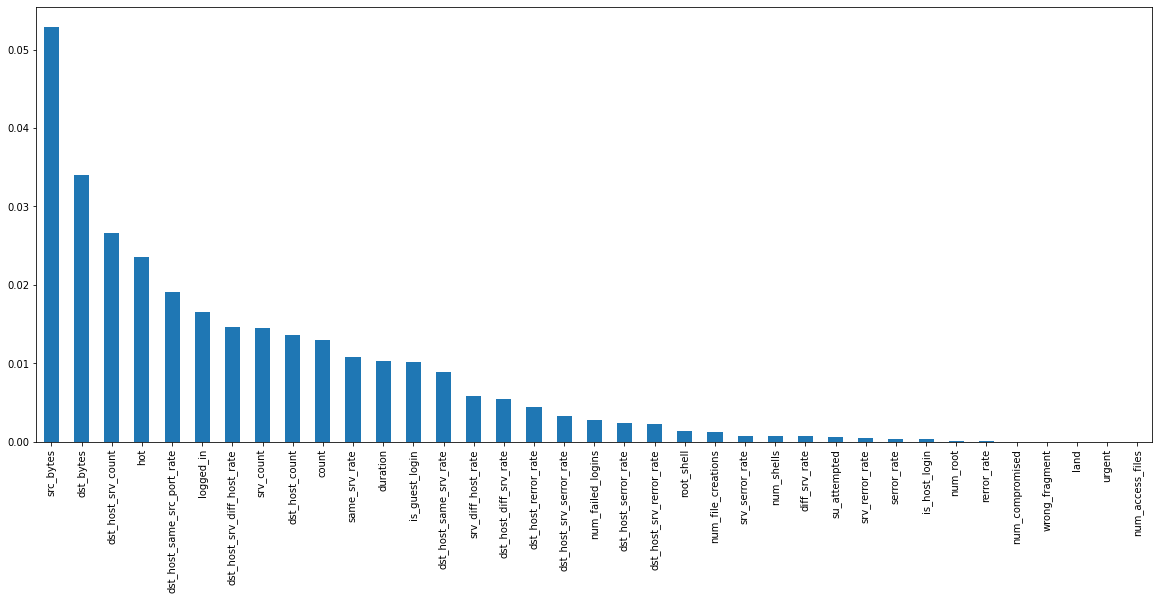

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8));

In [ ]:
sel_five_cols = SelectKBest(mutual_info_classif, k=20)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['duration', 'src_bytes', 'dst_bytes', 'hot', 'num_failed_logins',
       'logged_in', 'is_guest_login', 'count', 'srv_count', 'same_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate'],
      dtype='object')

In [ ]:
X_train = df_train[['srv_count','hot', 'logged_in', 'is_guest_login', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate']]

In [ ]:
scaler2 = MinMaxScaler()
df_minmax = scaler2.fit_transform(X_train)
X_train = pd.DataFrame(df_minmax, columns=(X_train.columns))
X_train

,srv_count,hot,logged_in,is_guest_login,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
0,0.003914,0.0,0.0,0.0,0.00,0.588235,0.098039,0.17,0.00
1,0.001957,0.0,0.0,0.0,0.00,1.000000,0.003922,0.88,0.00
2,0.009785,0.0,1.0,0.0,0.00,0.117647,1.000000,0.03,0.04
3,0.062622,0.0,1.0,0.0,0.09,1.000000,1.000000,0.00,0.00
4,0.013699,0.0,1.0,0.0,0.43,0.031373,0.858824,0.12,0.03
...,...,...,...,...,...,...,...,...,...
68385,0.001957,0.0,1.0,0.0,0.00,0.003922,0.007843,1.00,1.00
68386,0.021526,0.0,1.0,0.0,0.18,0.011765,1.000000,0.33,0.04
68387,0.003914,0.0,0.0,0.0,0.00,1.000000,0.956863,0.01,0.00
68388,0.001957,0.0,1.0,0.0,0.00,1.000000,0.117647,0.00,0.00


In [ ]:
ohe2 = OneHotEncoder(handle_unknown='ignore')
label_enc = ohe2.fit_transform(df_train.iloc[:,1:4])
label_enc.toarray()
new_labels = ohe2.get_feature_names_out(['protocol_type', 'service', 'flag'])
df_enc = pd.DataFrame(data=label_enc.toarray(), columns=new_labels)
X_train = pd.concat([X_train, df_enc], axis=1)
#df_train = df_train.drop(['protocol_type','service','flag'], axis=1)
X_train

,srv_count,hot,logged_in,is_guest_login,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,protocol_type_icmp,...,flag_OTH,flag_REJ,flag_RSTO,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.003914,0.0,0.0,0.0,0.00,0.588235,0.098039,0.17,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.001957,0.0,0.0,0.0,0.00,1.000000,0.003922,0.88,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.009785,0.0,1.0,0.0,0.00,0.117647,1.000000,0.03,0.04,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.062622,0.0,1.0,0.0,0.09,1.000000,1.000000,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.013699,0.0,1.0,0.0,0.43,0.031373,0.858824,0.12,0.03,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68385,0.001957,0.0,1.0,0.0,0.00,0.003922,0.007843,1.00,1.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
68386,0.021526,0.0,1.0,0.0,0.18,0.011765,1.000000,0.33,0.04,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
68387,0.003914,0.0,0.0,0.0,0.00,1.000000,0.956863,0.01,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
68388,0.001957,0.0,1.0,0.0,0.00,1.000000,0.117647,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df_test = df_test[(df_test['label']=='normal') | (df_test['label']=='guess_passwd') | (df_test['label']=='ftp_write')
                    | (df_test['label']=='imap') | (df_test['label']=='xsnoop') | (df_test['label']=='phf')
                    | (df_test['label']=='multihop') | (df_test['label']=='warezmaster') 
                    | (df_test['label']=='xlock')
                    | (df_test['label']=='snmpguess') | (df_test['label']=='snmpgetattack') 
                    | (df_test['label']=='httptunnel')
                    | (df_test['label']=='sendmail') | (df_test['label']=='named') 
                    | (df_test['label']=='spy') 
                    | (df_test['label']=='warezclient') | (df_test['label']=='buffer_overflow') 
                    | (df_test['label']=='loadmodule') | (df_test['label']=='rootkit')
                    | (df_test['label']=='perl') | (df_test['label']=='xterm') 
                    | (df_test['label']=='sqlattack')
                    | (df_test['label']=='ps')]

y_test = np.array([0 if x=='normal' else 1 for x in df_test['label']])
df_test = df_test.drop(['label'],axis=1)
df_test = df_test.reset_index().drop(['index'], axis=1)
df_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00
1,0,tcp,http,SF,267,14515,0,0,0,0,...,155,255,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00
2,0,tcp,smtp,SF,1022,387,0,0,0,0,...,255,28,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04
3,0,tcp,telnet,SF,129,174,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02
4,0,tcp,http,SF,327,467,0,0,0,0,...,151,255,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12658,0,tcp,http,SF,274,1623,0,0,0,0,...,92,255,1.00,0.00,0.01,0.04,0.00,0.00,0.00,0.00
12659,0,tcp,http,SF,280,6087,0,0,0,0,...,5,255,1.00,0.00,0.20,0.04,0.00,0.00,0.00,0.00
12660,0,tcp,smtp,SF,794,333,0,0,0,0,...,100,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00
12661,0,tcp,http,SF,317,938,0,0,0,0,...,197,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00


In [ ]:
X_test = df_test[['srv_count','hot', 'logged_in', 'is_guest_login', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate']]

In [ ]:
df_minmax = scaler2.transform(X_test)
X_test = pd.DataFrame(df_minmax, columns=(X_test.columns))
X_test

,srv_count,hot,logged_in,is_guest_login,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
0,0.001957,0.0,0.0,0.0,0.00,0.525490,0.337255,0.61,0.02
1,0.007828,0.0,1.0,0.0,0.00,0.607843,1.000000,0.01,0.03
2,0.005871,0.0,1.0,0.0,1.00,1.000000,0.109804,0.00,0.00
3,0.001957,0.0,0.0,0.0,0.00,1.000000,1.000000,0.00,0.00
4,0.091977,0.0,1.0,0.0,0.04,0.592157,1.000000,0.01,0.03
...,...,...,...,...,...,...,...,...,...
12658,0.001957,0.0,1.0,0.0,0.00,0.360784,1.000000,0.01,0.04
12659,0.005871,0.0,1.0,0.0,0.00,0.019608,1.000000,0.20,0.04
12660,0.001957,0.0,1.0,0.0,0.00,0.392157,0.552941,0.01,0.01
12661,0.021526,0.0,1.0,0.0,0.18,0.772549,1.000000,0.01,0.01


In [ ]:
label_enc = ohe2.transform(df_test.iloc[:,1:4])
label_enc.toarray()
new_labels = ohe2.get_feature_names_out(['protocol_type', 'service', 'flag'])
df_enc = pd.DataFrame(data=label_enc.toarray(), columns=new_labels)
X_test = pd.concat([X_test, df_enc], axis=1)
X_test

,srv_count,hot,logged_in,is_guest_login,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,protocol_type_icmp,...,flag_OTH,flag_REJ,flag_RSTO,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.001957,0.0,0.0,0.0,0.00,0.525490,0.337255,0.61,0.02,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.007828,0.0,1.0,0.0,0.00,0.607843,1.000000,0.01,0.03,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.005871,0.0,1.0,0.0,1.00,1.000000,0.109804,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.001957,0.0,0.0,0.0,0.00,1.000000,1.000000,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.091977,0.0,1.0,0.0,0.04,0.592157,1.000000,0.01,0.03,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12658,0.001957,0.0,1.0,0.0,0.00,0.360784,1.000000,0.01,0.04,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12659,0.005871,0.0,1.0,0.0,0.00,0.019608,1.000000,0.20,0.04,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12660,0.001957,0.0,1.0,0.0,0.00,0.392157,0.552941,0.01,0.01,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12661,0.021526,0.0,1.0,0.0,0.18,0.772549,1.000000,0.01,0.01,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(68390, 49)
(68390,)
(12663, 49)
(12663,)


In [ ]:
from imblearn.under_sampling import RandomUnderSampler as under_sam
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
sm = under_sam(sampling_strategy=1)
X_train, y_train = sm.fit_resample(X_train,y_train)

# pca_r2l_u2r = PCA(n_components=0.95)
# X_train_r2l_u2r = pca_r2l_u2r.fit_transform(X_train)
# X_test_r2l_u2r = pca_r2l_u2r.transform(X_test)

kpca_r2l_u2r = KernelPCA(n_components=2, kernel="rbf")
X_train_r2l_u2r = kpca_r2l_u2r.fit_transform(X_train)
X_test_r2l_u2r = kpca_r2l_u2r.transform(X_test)

r2l_u2r_classifier = SVC(C=0.1, gamma=0.01, kernel='rbf')
r2l_u2r_classifier.fit(X_train_r2l_u2r, y_train)
predicted = r2l_u2r_classifier.predict(X_test_r2l_u2r)
print(confusion_matrix(y_test,predicted))
print('Accuracy = ', accuracy_score(y_test,predicted))
print('F1 Score = ', f1_score(y_test,predicted))
print('Precision = ', precision_score(y_test,predicted))
print('Recall = ', recall_score(y_test,predicted))
print(X_train_r2l_u2r.shape)

[[8813  898]
 [1563 1389]]
Accuracy =  0.8056542683408355
F1 Score =  0.5302538652414582
Precision =  0.6073458679492786
Recall =  0.47052845528455284
(2094, 2)


In [ ]:
df_test1 = copy.deepcopy(df_test_original)
df_test2 = copy.deepcopy(df_test_original)
y_test_real = np.array([0 if x=='normal' else 1 for x in df_test1['label']])

In [ ]:
X_test = df_test1[['logged_in', 'count', 'serror_rate', 'rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_srv_rerror_rate']]

df_minmax = scaler1.transform(X_test)
X_test = pd.DataFrame(df_minmax, columns=(X_test.columns))
label_enc = ohe.transform(df_test1.iloc[:,1:4])
label_enc.toarray()
new_labels = ohe.get_feature_names_out(['protocol_type', 'service', 'flag'])
df_enc = pd.DataFrame(data=label_enc.toarray(), columns=new_labels)
X_test = pd.concat([X_test, df_enc], axis=1)

X_test_layer1 = pca_dos_probe.transform(X_test)

# X_test_layer1 = kpca_dos_probe.transform(X_test)
print(X_test_layer1.shape)

(22544, 29)


In [ ]:
X_test = df_test2[['srv_count','hot', 'logged_in', 'is_guest_login', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate']]

df_minmax = scaler2.transform(X_test)
X_test = pd.DataFrame(df_minmax, columns=(X_test.columns))
label_enc = ohe2.transform(df_test2.iloc[:,1:4])
label_enc.toarray()
new_labels = ohe2.get_feature_names_out(['protocol_type', 'service', 'flag'])
df_enc = pd.DataFrame(data=label_enc.toarray(), columns=new_labels)
X_test = pd.concat([X_test, df_enc], axis=1)

# X_test_layer2 = pca_r2l_u2r.transform(X_test)

X_test_layer2 = kpca_r2l_u2r.transform(X_test)
print(X_test_layer2.shape)

(22544, 2)


In [ ]:
classifier1 = dos_probe_classifier
classifier2 = r2l_u2r_classifier

In [ ]:
result = []

for i in range(22544):
    layer1 = classifier1.predict(X_test_layer1[i].reshape(1, -1))[0]
    if layer1 == 1:
        result.append(layer1)
    else:
        layer2 = classifier2.predict(X_test_layer2[i].reshape(1, -1))[0]
        if layer2 == 1:
            result.append(layer2)
        else:
            result.append(0)
            
result = np.array(result)
result

array([1, 1, 1, ..., 0, 0, 1])

In [ ]:
print(confusion_matrix(y_test_real,result))
print('Accuracy = ', accuracy_score(y_test_real,result))
print('F1 Score = ', f1_score(y_test_real,result))
print('Precision = ', precision_score(y_test_real,result))
print('Recall = ', recall_score(y_test_real,result))

[[ 8014  1697]
 [  863 11970]]
Accuracy =  0.886444286728176
F1 Score =  0.9033962264150944
Precision =  0.8758322967732495
Recall =  0.932751500038962


In [ ]:
df_test = pd.read_csv('KDDTest+.txt', sep=",", header=None)
df_test = df_test[df_test.columns[:-1]]
df_test.columns = titles.to_list()
y_test = df_test['label']
df_test = df_test.drop(['num_outbound_cmds'],axis=1)
df_test_original = df_test

In [ ]:
new_attack = []
for i in df_test_original['label'].value_counts().index.tolist()[1:]:
    if i not in df_train_original['label'].value_counts().index.tolist()[1:]:
        new_attack.append(i)
        
new_attack.sort()
new_attack

['apache2',
 'httptunnel',
 'mailbomb',
 'mscan',
 'named',
 'processtable',
 'ps',
 'saint',
 'sendmail',
 'snmpgetattack',
 'snmpguess',
 'sqlattack',
 'udpstorm',
 'worm',
 'xlock',
 'xsnoop',
 'xterm']

In [ ]:
index_of_new_attacks = []

for i in range(len(df_test_original)):
    if df_test_original['label'][i] in new_attack:
        index_of_new_attacks.append(df_test_original.index[i])

In [ ]:
len(index_of_new_attacks)

3750

In [ ]:
new_attack.append('normal')
new_attack

['apache2',
 'httptunnel',
 'mailbomb',
 'mscan',
 'named',
 'processtable',
 'ps',
 'saint',
 'sendmail',
 'snmpgetattack',
 'snmpguess',
 'sqlattack',
 'udpstorm',
 'worm',
 'xlock',
 'xsnoop',
 'xterm',
 'normal']

In [ ]:
index_of_old_attacks = []

for i in range(len(df_test_original)):
    if df_test_original['label'][i] not in new_attack:
        index_of_old_attacks.append(df_test_original.index[i])

In [ ]:
len(index_of_old_attacks)

9083

In [ ]:
print(result[index_of_new_attacks].shape[0])
print(result[index_of_new_attacks].sum())
print(result[index_of_new_attacks].sum()/result[index_of_new_attacks].shape[0])

3750
3223
0.8594666666666667


In [ ]:
print(result[index_of_old_attacks].shape[0])
print(result[index_of_old_attacks].sum())
print(result[index_of_old_attacks].sum()/result[index_of_old_attacks].shape[0])

9083
8747
0.9630078168006165


In [ ]:
df_test = pd.read_csv('KDDTest+.txt', sep=",", header=None)
df_test = df_test[df_test.columns[:-1]]
df_test.columns = titles.to_list()
y_test = df_test['label']
df_test = df_test.drop(['num_outbound_cmds'],axis=1)
df_test_original = df_test
df = df_test_original

dos_index = df.index[(df['label'] == 'apache2') | (df['label']=='back') 
                     | (df['label'] == 'land') | (df['label'] == 'mailbomb') 
                     | (df['label'] == 'neptune') | (df['label'] == 'pod') 
                     | (df['label'] == 'processtable') | (df['label'] == 'smurf') 
                     | (df['label'] == 'teardrop') | (df['label'] == 'udpstorm') 
                     | (df['label'] == 'worm')].tolist()

probe_index = df.index[(df['label'] == 'ipsweep') | (df['label']=='mscan') 
                       | (df['label']=='nmap') | (df['label'] == 'portsweep') 
                       | (df['label'] == 'saint') | (df['label'] == 'satan')].tolist()

r2l_index = df.index[(df['label'] == 'ftp_write') | (df['label']=='guess_passwd') 
                     | (df['label'] == 'httptunnel') | (df['label'] == 'imap') 
                     | (df['label'] == 'multihop') | (df['label'] == 'named') 
                     | (df['label'] == 'phf') | (df['label'] == 'sendmail') 
                     | (df['label'] == 'snmpgetattack') | (df['label'] == 'snmpguess') 
                     | (df['label'] == 'warezmaster') | (df['label'] == 'xlock') 
                     | (df['label'] == 'xsnoop')].tolist()

u2r_index = df.index[(df['label'] == 'buffer_overflow') | (df['label']=='loadmodule') 
                       | (df['label']=='perl') | (df['label'] == 'ps') 
                       | (df['label'] == 'rootkit') | (df['label'] == 'sqlattack')
                       | (df['label'] == 'xterm')].tolist()

# print("full sample:", result[dos_index].shape[0])
# print("detected sample:", result[dos_index].sum())
print("dos:", result[dos_index].sum()/result[dos_index].shape[0])

print("probe:",result[probe_index].sum()/result[probe_index].shape[0])

print("r2l:",result[r2l_index].sum()/result[r2l_index].shape[0])

print("u2r:",result[u2r_index].sum()/result[u2r_index].shape[0])

dos: 0.8871313672922252
probe: 0.9958694754233788
r2l: 0.9989601386481802
u2r: 0.8805970149253731


In [ ]:
# Dectsion Tree model
from sklearn.tree import DecisionTreeClassifier
# instantiate the model
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

In [ ]:
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)
print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.947
Decision Tree: Accuracy on test Data: 0.000


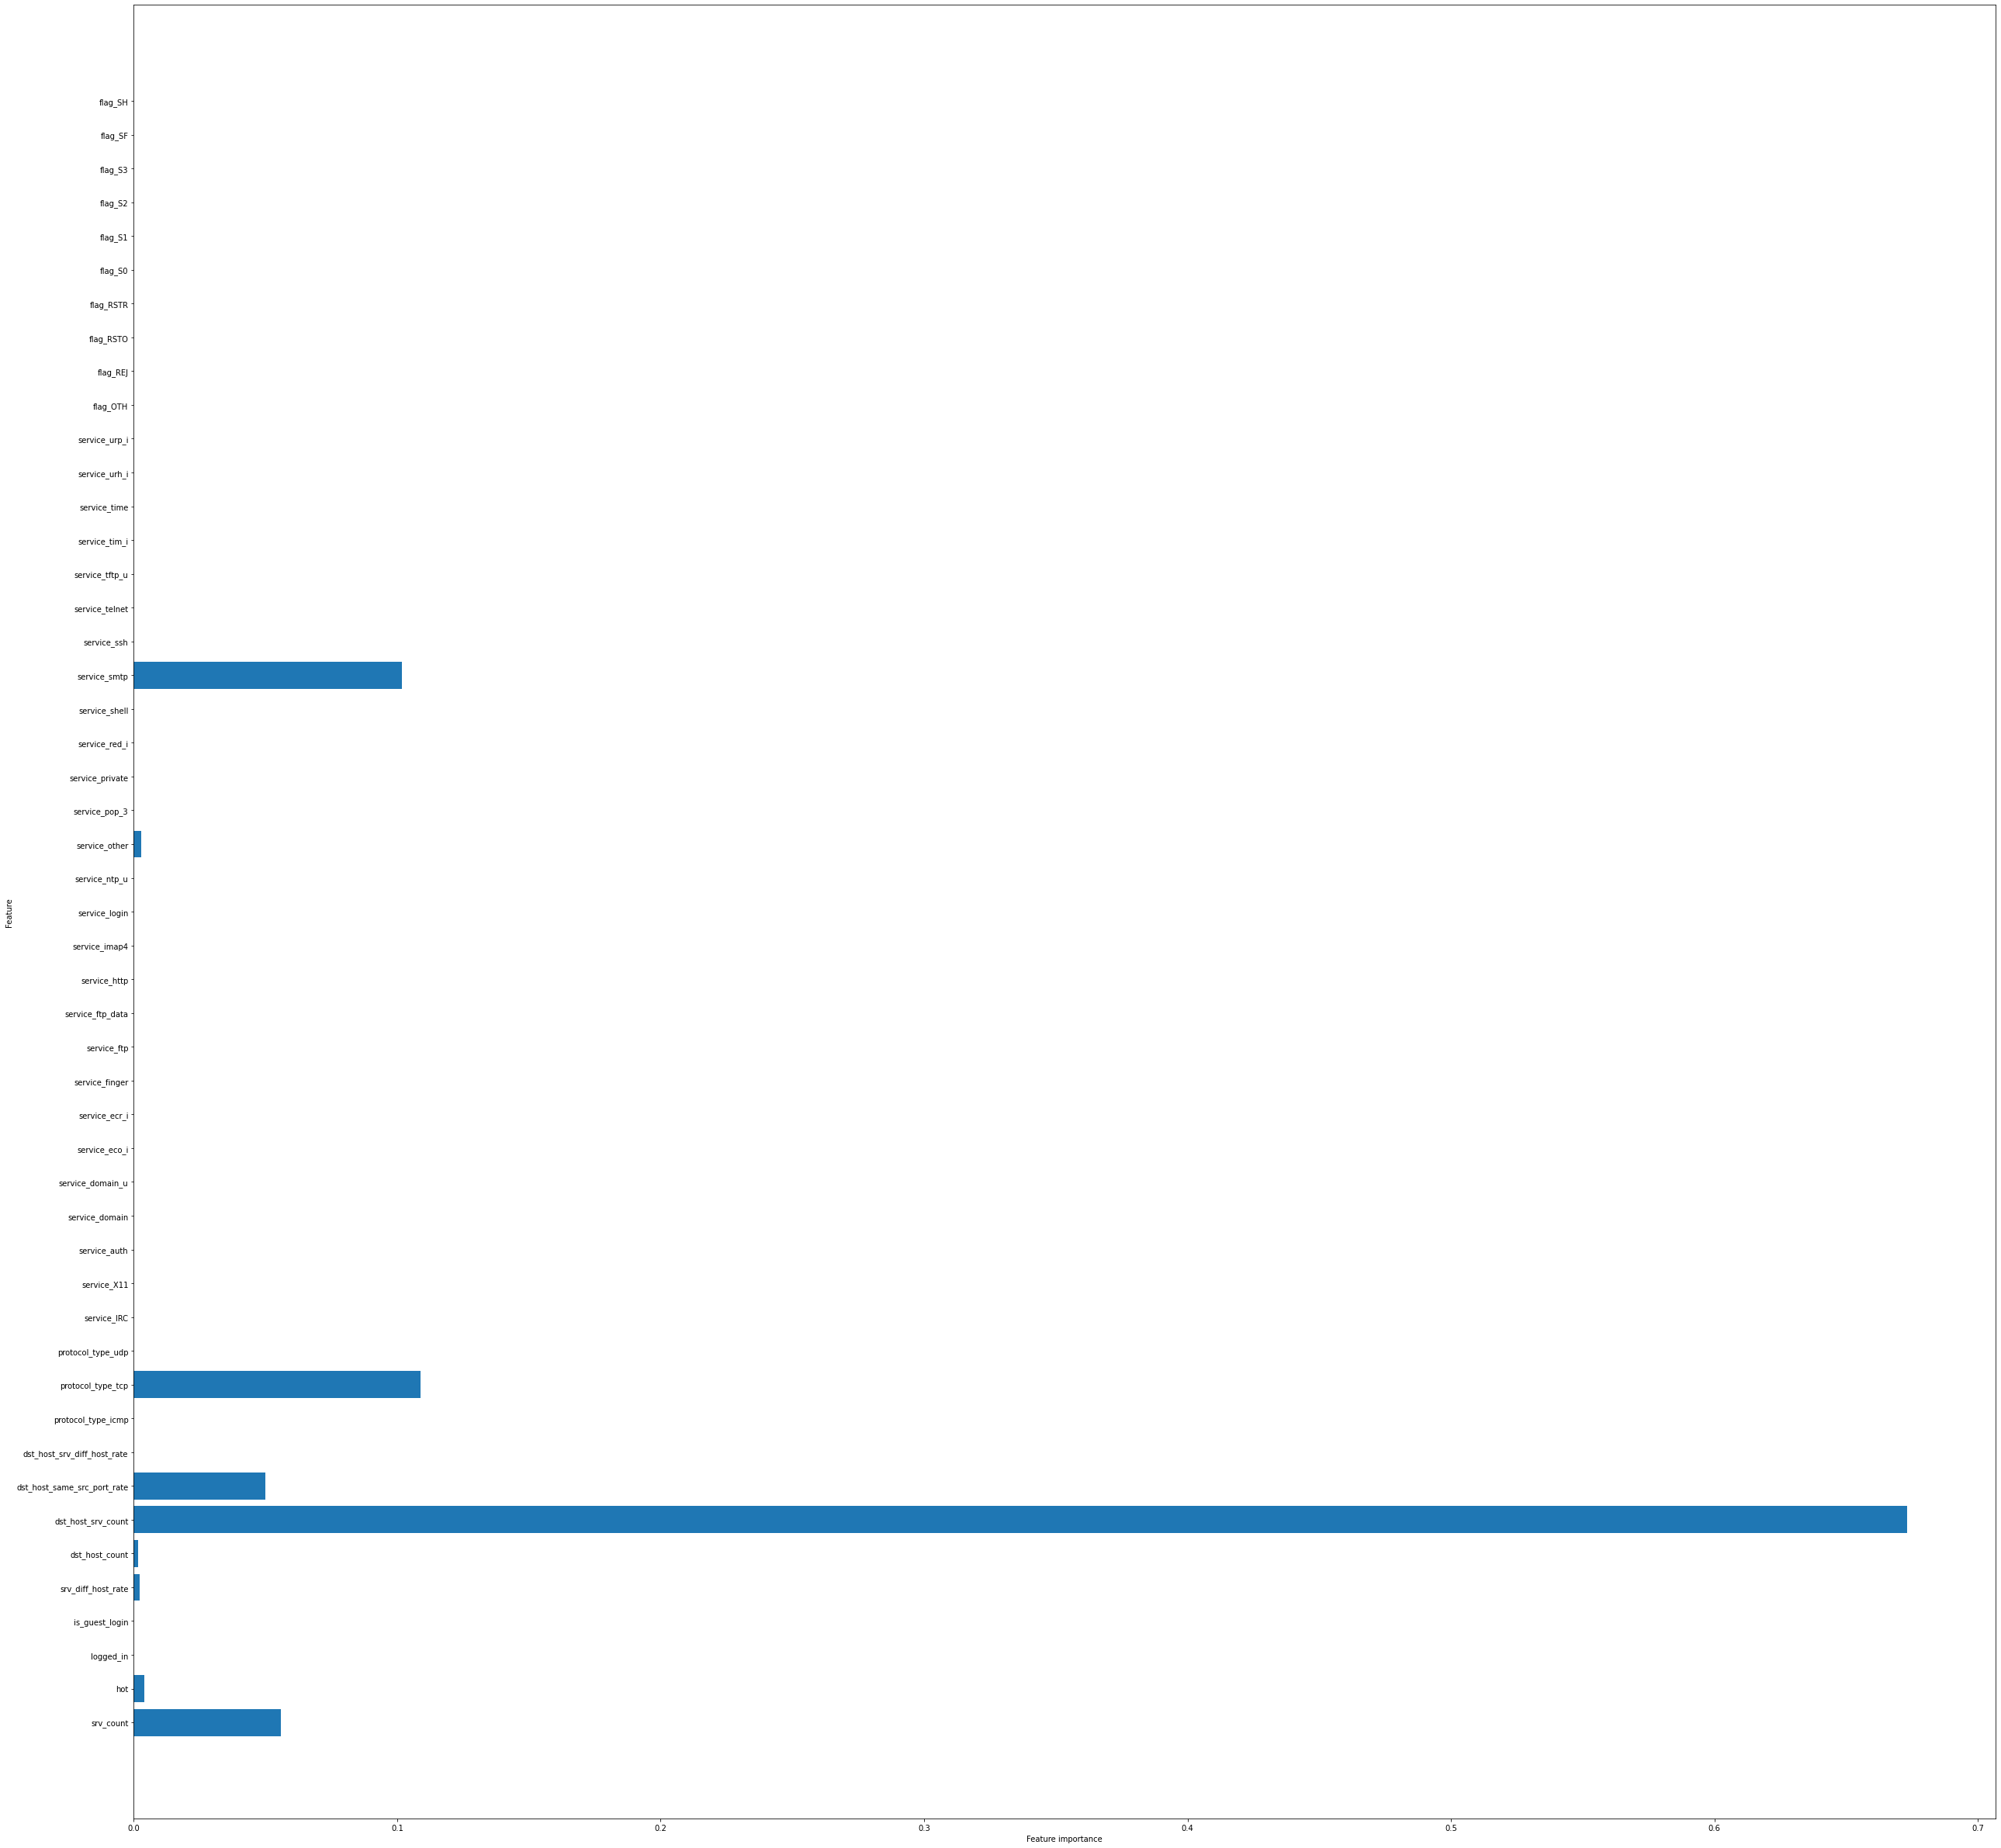

In [ ]:
plt.figure(figsize=(43,43))

n_features = X_train.shape[1]

plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")

plt.ylabel("Feature")

plt.show()

# **Loading Data**

In [ ]:
np.random.seed(100)

dataset_root = r'/content/drive/MyDrive/archive'
train_file = os.path.join(dataset_root, 'KDDTrain+.txt')
test_file = os.path.join(dataset_root, 'KDDTest+.txt')

In [ ]:
header_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type',
'success_pred']

In [ ]:
len(header_names)

43

# **Data Preprocessing**

In [ ]:
#Converting header into array

col_names = np.array(header_names)

#No retationship b/w nuserics

nominal_idx = [1, 2, 3]

#binaryb values

binary_idx = [6, 11, 13, 14, 20, 21]
#difference between two sets.

numeric_idx = list(set(range(41)).difference(nominal_idx).difference(binary_idx))
nominal_cols = col_names[nominal_idx].tolist()
binary_cols = col_names[binary_idx].tolist()
numeric_cols = col_names[numeric_idx].tolist()

In [ ]:
print(nominal_cols)

['protocol_type', 'service', 'flag']


In [ ]:
print(binary_cols)

['land', 'logged_in', 'root_shell', 'su_attempted', 'is_host_login', 'is_guest_login']


In [ ]:
print(numeric_cols)

['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'num_compromised', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


In [ ]:
category = defaultdict(list)
category['begin'].append('normal')

with open(r'/content/drive/MyDrive/archive/training_attack_types.txt', 'r') as f:
  for line in f.readlines():
    attack, cat = line.strip().split(' ')
    category[cat].append(attack)

attack_mapping = dict((v,k) for k in category for v in category[k])
train_df = pd.read_csv(train_file, names=header_names)

train_df['attack_category'] = train_df['attack_type'] \
  .map(lambda x: attack_mapping[x])
train_df.drop(['success_pred'],axis=1, inplace=True)

test_df = pd.read_csv(test_file, names=header_names)
test_df['attack_category'] = test_df['attack_type'] \
  .map(lambda x: attack_mapping[x])
test_df.drop(['success_pred'],axis=1, inplace=True)

train_attack_types = train_df['attack_type'].value_counts()
train_attack_cats = train_df['attack_category'].value_counts()

test_attack_types = test_df['attack_type'].value_counts()
test_attack_cats = test_df['attack_category'].value_counts()

train_attack_types.plot(kind= 'barh', figsize=(20,10), fontsize=20)

train_attack_cats.plot(kind= 'barh', figsize=(20,10), fontsize=30)

test_attack_types.plot(kind='barh', figsize=(20,10), fontsize=15)

test_attack_cats.plot(kind='barh', figsize=(20,10), fontsize=30)


FileNotFoundError: ignored

In [ ]:
print(category)

In [ ]:
train_df.head()

In [ ]:
train_df[binary_cols].describe().transpose()

In [ ]:
train_df.groupby(['su_attempted']).size()

In [ ]:
train_df['su_attempted'].replace(2,0,inplace=True)
test_df['su_attempted'].replace(2,0,inplace=True)
train_df.groupby(['su_attempted']).size()

In [ ]:
train_df.groupby(['num_outbound_cmds']).size()

In [ ]:
train_df.drop('num_outbound_cmds', axis=1, inplace=True)
test_df.drop('num_outbound_cmds', axis=1, inplace=True)
#numeric_cols.remove('num_outbound_cmds')
#Data Preparation
train_Y = train_df['attack_category']
train_x_raw = train_df.drop(['attack_category','attack_type'], axis=1)
test_Y = test_df['attack_category']
test_x_raw = test_df.drop(['attack_category','attack_type'], axis=1)

combined_df_raw = pd.concat([train_x_raw, test_x_raw])
combined_df = pd.get_dummies(combined_df_raw, columns=nominal_cols, drop_first=True)

train_x = combined_df[:len(train_x_raw)]
test_x = combined_df[len(train_x_raw):]

In [ ]:
x_train = train_x_raw
x_test = test_x_raw

# **Training**

In [ ]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []
#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

In [ ]:
#importing packoges
from sklearn.metrics import accuracy_score
X_train=train_x
y_train=train_Y
X_test=test_x
y_test=test_Y

NameError: ignored

# **1. Decision Tree Classifier**

In [ ]:
# Dectsion Tree model
from sklearn.tree import DecisionTreeClassifier
# instantiate the model
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
#predicting the target value from the model for the somples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)
print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.947
Decision Tree: Accuracy on test Data: 0.000


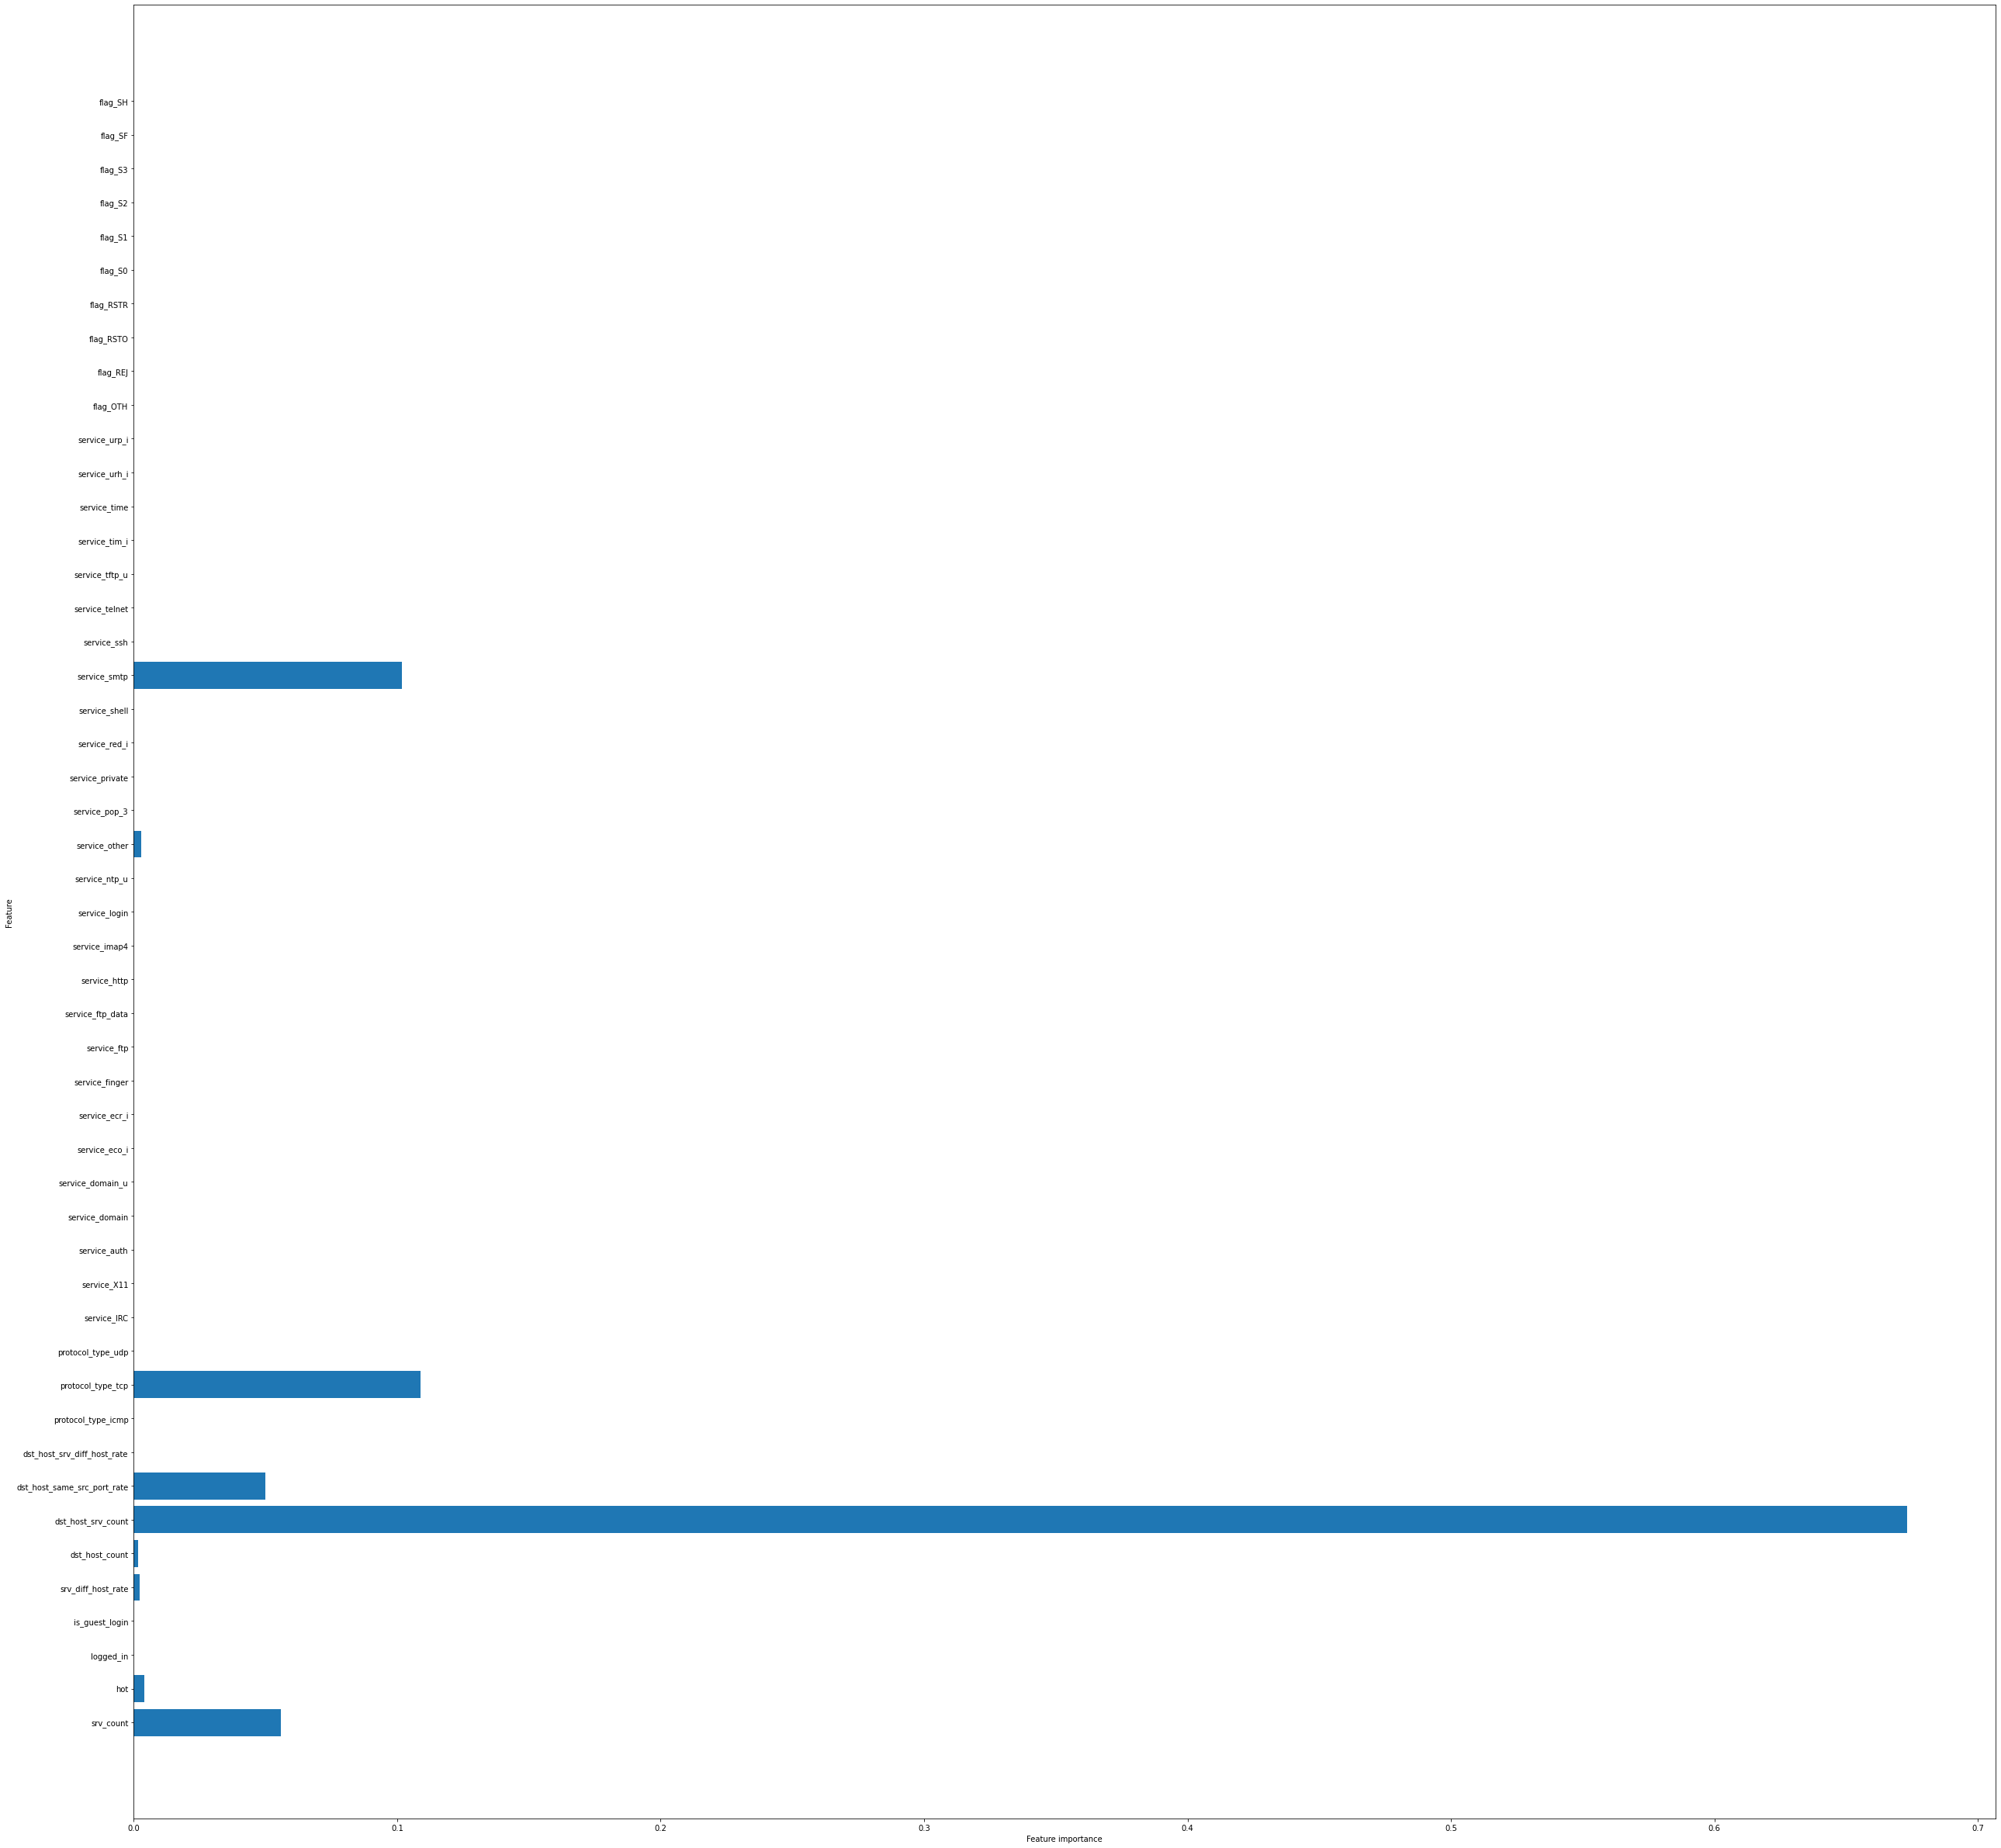

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(43,43))

n_features = X_train.shape[1]

plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")

plt.ylabel("Feature")

plt.show()

In [ ]:
#storing the resuits. The delow mentioned order of porameter possing {s (sportant.
#Coution: Execute only once to owoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

# **2. Random Forest Classifier**

In [ ]:
# Randow Forest model

from sklearn.ensemble import RandomForestClassifier
# instontiote the model

forest = RandomForestClassifier(max_depth=5)

# fit the model

forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [ ]:
#predicting the target volue from the model for the somples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

In [ ]:
#computing the occuracy of the model performonce

acc_train_forest = accuracy_score(y_train,y_train_forest)

acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy om test Dota: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.975
Random forest: Accuracy om test Dota: 0.000


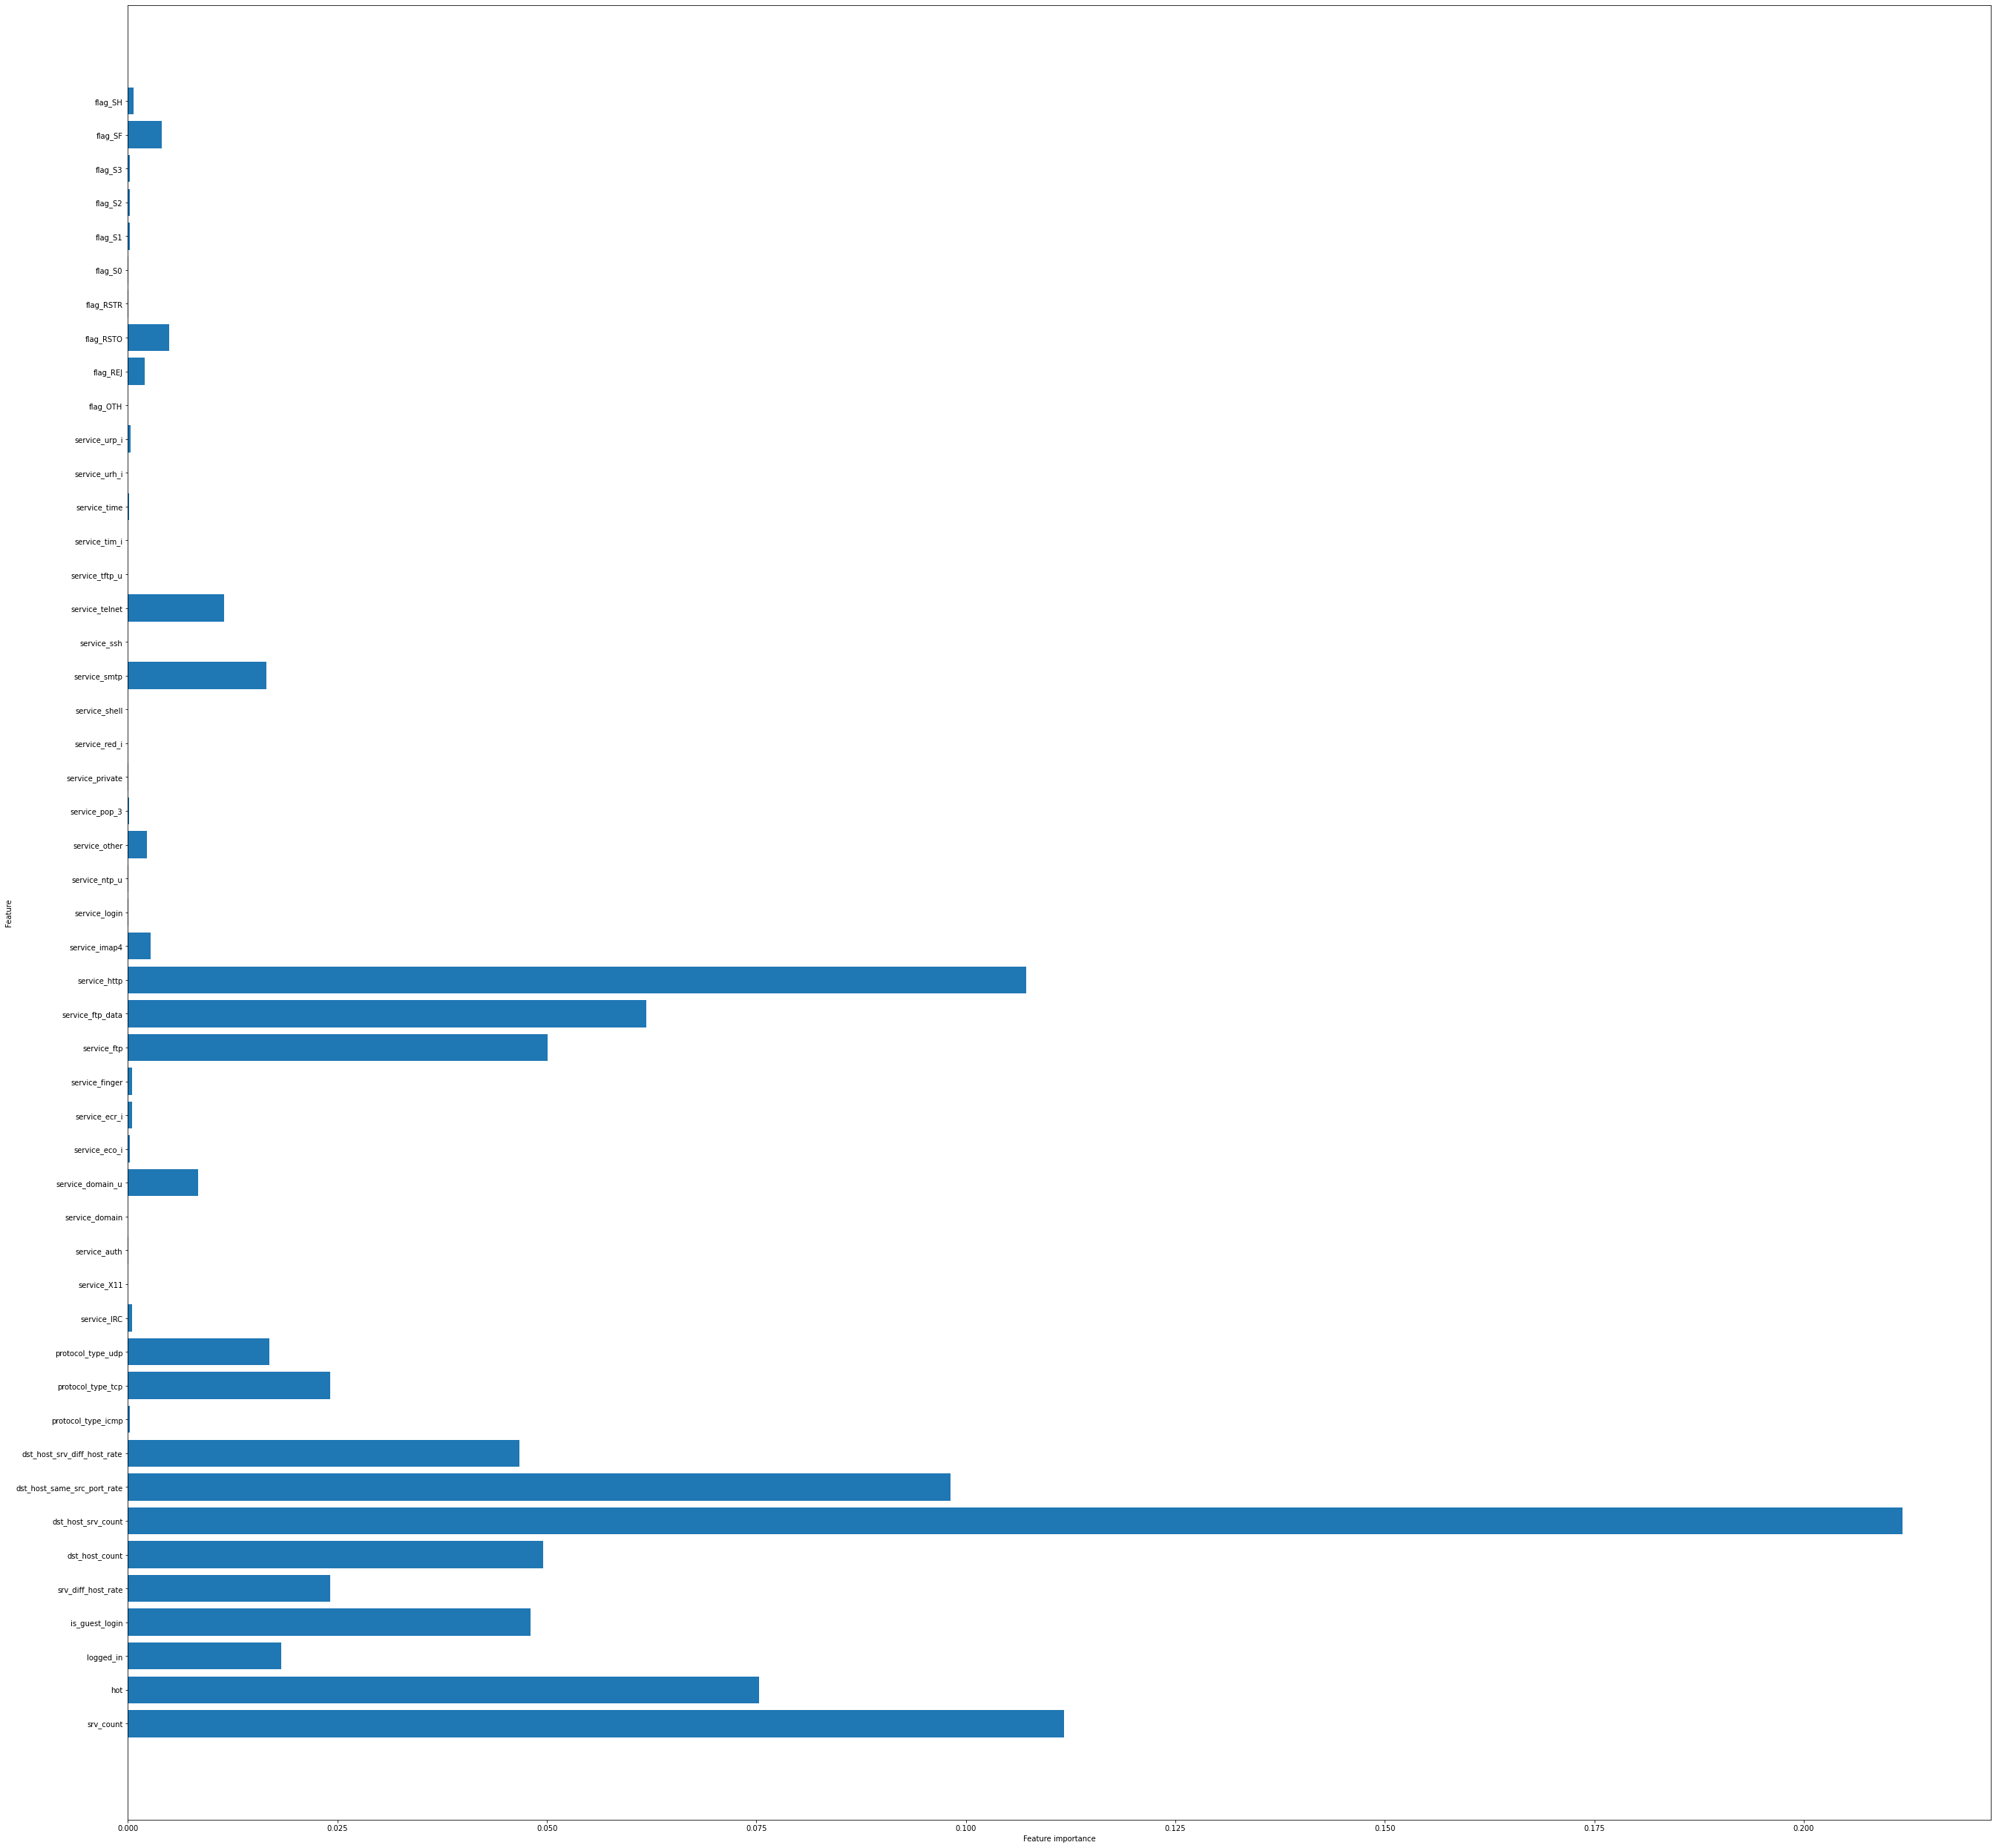

In [ ]:
#checking the feature {mprotance in the model
plt.figure(figsize=(45,45))

n_features = X_train.shape[1]

plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)

plt.xlabel("Feature importance")

plt.ylabel("Feature")

plt.show()

# **3. Multi Layer Perceptron**

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), activation='relu', solver='adam', max_iter=1500)
mlp.fit(X_train,y_train)

y_train_mlp = mlp.predict(X_train)

y_test_mlp = mlp.predict(X_test)

In [ ]:
acc_train_mlp = accuracy_score(y_train,y_train_mlp)

acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("MLP: Accuracy on training Data: {:.5f}".format(acc_train_mlp))
print("MLP: Accuracy on test Data: {:.5f}".format(acc_test_mlp))

MLP: Accuracy on training Data: 0.99045
MLP: Accuracy on test Data: 0.00000


# **4. Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression(solver='lbfgs', max_iter=100)
regressor.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#predicting the target value from the model for the samples
y_test_regressor = regressor.predict(X_test)
y_train_regressor = regressor.predict(X_train)

In [ ]:
#computing the accuracy of the model performance

from sklearn.metrics import accuracy_score

acc_train_regressor = accuracy_score(y_train,y_train_regressor)

acc_test_regressor = accuracy_score(y_test,y_test_regressor)

print("Random forest: Accuracy on training Data: {:.5f}".format(acc_train_regressor))
print("Random forest: Accuracy on test Data: {:.5f}".format(acc_test_regressor))

Random forest: Accuracy on training Data: 0.96132
Random forest: Accuracy on test Data: 0.00000


# **5. Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_test_nb = naive.predict(X_test)
y_train_nb = naive.predict(X_train)

In [ ]:
acc_train_nb = accuracy_score(y_train,y_train_nb)

acc_test_nb = accuracy_score(y_test,y_test_nb)

print("Naive Bayes: Accuracy on training Data: {:.5f}".format(acc_train_nb))
print("Naive Bayes: Accuracy on test Data: {:.5f}".format(acc_test_nb))

Naive Bayes: Accuracy on training Data: 0.94174
Naive Bayes: Accuracy on test Data: 0.00000


In [ ]:
storeResults('NaiveBayes', acc_train_nb, acc_test_nb)

# **Comparison of Models**

In [ ]:
#creating dataframe

results = pd.DataFrame({ 'ML Model': ML_Model,'Train Accuracy': acc_train, 'Test Accuracy': acc_test})

results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.947,0.0
1,NaiveBayes,0.942,0.0


In [ ]:
#Sorting the datafram on accuracy
results.sort_values(by=[ 'Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.947,0.0
1,NaiveBayes,0.942,0.0
